**Задание**

**Цель:** применить на практике базовые ансамблевые методы

**Описание задания:**

В домашнем задании нужно решить задачу классификации наличия болезни сердца у пациентов. Данные для обучения моделей необходимо загрузить самостоятельно с сайта.

Целевая переменная – наличие болезни сердца (HeartDisease), принимает значения 0 или 1 в зависимости от отсутствия или наличия болезни соответственно. (Подробнее о признаках можно прочесть в описании датасета на сайте. Для выполнения работы не обязательно вникать в медицинские показатели.)

**Этапы работы:**

1. Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую)
2. Подготовьте датасет к обучению моделей.

  a) Категориальные переменные переведите в цифровые значения. Можно использовать pd.get_dummies, preprocessing.LabelEncoder.
Старайтесь не использовать для этой задачи циклы.

  b) *Постройте 1-2 графика на выбор. Визуализация должна быть основана на исследуемых данных и быть полезной (из графика можно сделать вывод об особенностях датасета/класса/признака).

3. Разделите выборку на обучающее и тестовое подмножество. 80% данных оставить на обучающее множество, 20% на тестовое.
4. Обучите дерево решений на обучающем множестве. Используйте следующие модели:

  a) tree.DecisionTreeClassifier

  b) ensemble.RandomForestClassifier

5. Для тестового множества сделайте предсказание целевой переменной. Выведите метрики для каждой построенной модели с помощью metrics.classification_report.
6. Выведите важность признаков, полученную после обучения модели из п. 4b в виде столбчатой диаграммы. Отсортируйте важность по убыванию.
7. Обучите бэггинг над моделью из п. 4a. Используйте ensemble.BaggingClassifier.

  a) Повторите п. 5
8. Обучите стекинг трех моделей: из п. 4a, п. 4b и svm.LinearSVC. Используйте ensemble.StackingClassifier.

  a) Повторите п. 5
9. Сформулируйте выводы по проделанной работе.

  a) Сравните метрики построенных моделей.

  b) Напишите свое мнение, какая модель наилучшая и почему.

Для получения зачета по этому домашнему заданию, минимально, должны быть обучены следующие модели: дерево решений, стекинг трех моделей. В данных должны быть обработаны категориальные значения.

**1. Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую)**


In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                                  title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
teocalvo/teomewhy-loyalty-system                                     TeoMeWhy Loyalty System                           22MB  2024-06-14 19:10:56            149        358  1.0              
shreyanshverma27/online-sales-dataset-popular-marketplace-data       Online Sales Dataset - Popular Marketplace Data    7KB  2024-05-25 23:55:26           7827        142  1.0              
mayankanand2701/tesla-stock-price-dataset                            Tesla Stock Price Dataset 🚘🧑‍💻⚙️🔥                 71KB  2024-06-08 14:42:34           1097         22  1.0              
damirdizdarevic/uefa-euro-2024-players            

In [ ]:
! kaggle datasets download -d fedesoriano/heart-failure-prediction

Dataset URL: https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction
License(s): ODbL-1.0
  0% 0.00/8.56k [00:00<?, ?B/s]
100% 8.56k/8.56k [00:00<00:00, 16.7MB/s]


In [ ]:
! mkdir train

In [ ]:
! unzip /content/heart-failure-prediction.zip -d train

Archive:  /content/heart-failure-prediction.zip
  inflating: train/heart.csv         


In [ ]:
import pandas as pd

data = pd.read_csv('train/heart.csv')
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


**2. Подготовьте датасет к обучению моделей.**

  a) Категориальные переменные переведите в цифровые значения. Можно использовать pd.get_dummies, preprocessing.LabelEncoder.
Старайтесь не использовать для этой задачи циклы.

  b) *Постройте 1-2 графика на выбор. Визуализация должна быть основана на исследуемых данных и быть полезной (из графика можно сделать вывод об особенностях датасета/класса/признака).



In [ ]:
#Проверим датасет на пропуски
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


Пропуски/аномалии не выявлены

In [ ]:
#Уберем дубликаты, если они есть
data.drop_duplicates(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
#Выведем названия колонок с категориальными признаками
object_cols = data.select_dtypes('object').columns
list(object_cols)

['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

In [ ]:
#Посмотрим на количество категорий внутри категориальных признаков
for col in list(object_cols):
    print(f'{col}: {data[col].unique()}')

Sex: ['M' 'F']
ChestPainType: ['ATA' 'NAP' 'ASY' 'TA']
RestingECG: ['Normal' 'ST' 'LVH']
ExerciseAngina: ['N' 'Y']
ST_Slope: ['Up' 'Flat' 'Down']


In [ ]:
#Сформируем датасет для дальнейшей работы (с обработанными категориальными признаками)
data_for_work = pd.get_dummies(data, columns=list(object_cols))
data_for_work.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,False,True,False,...,False,False,False,True,False,True,False,False,False,True
1,49,160,180,0,156,1.0,1,True,False,False,...,True,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,0,False,True,False,...,False,False,False,False,True,True,False,False,False,True
3,48,138,214,0,108,1.5,1,True,False,True,...,False,False,False,True,False,False,True,False,True,False
4,54,150,195,0,122,0.0,0,False,True,False,...,True,False,False,True,False,True,False,False,False,True


In [ ]:
data_for_work.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                918 non-null    int64  
 1   RestingBP          918 non-null    int64  
 2   Cholesterol        918 non-null    int64  
 3   FastingBS          918 non-null    int64  
 4   MaxHR              918 non-null    int64  
 5   Oldpeak            918 non-null    float64
 6   HeartDisease       918 non-null    int64  
 7   Sex_F              918 non-null    bool   
 8   Sex_M              918 non-null    bool   
 9   ChestPainType_ASY  918 non-null    bool   
 10  ChestPainType_ATA  918 non-null    bool   
 11  ChestPainType_NAP  918 non-null    bool   
 12  ChestPainType_TA   918 non-null    bool   
 13  RestingECG_LVH     918 non-null    bool   
 14  RestingECG_Normal  918 non-null    bool   
 15  RestingECG_ST      918 non-null    bool   
 16  ExerciseAngina_N   918 non

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

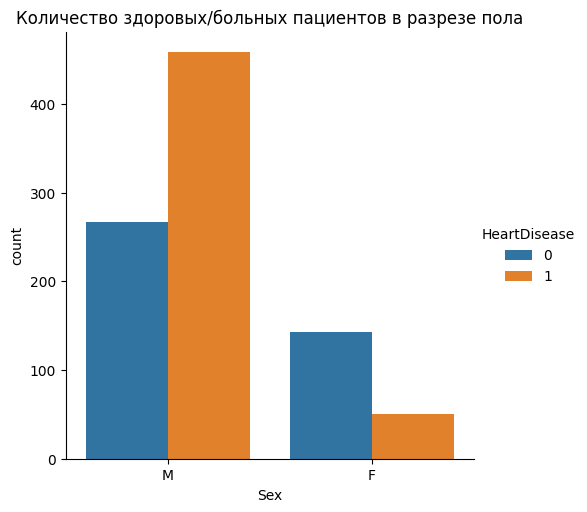

In [ ]:
sns.catplot(x = 'Sex',
            hue = 'HeartDisease',
            kind = 'count',
            data = data).set(title = 'Количество здоровых/больных пациентов в разрезе пола');

**Как видно из графика:**

1) бОльшая часть записей содержит информацию о пациентах мужчинах;

2) Внутри гендерных групп у большинства мужчин диагностирована болезнь сердца, в то время как у большинства женщин болезнь сердца отсутствует.


**3. Разделите выборку на обучающее и тестовое подмножество. 80% данных оставить на обучающее множество, 20% на тестовое.**


In [ ]:
X = data_for_work.loc[:, data_for_work.columns != 'HeartDisease'] #признаки
y = data_for_work['HeartDisease'] #Целевая переменная

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

**4. Обучите дерево решений на обучающем множестве. Используйте следующие модели:**

  a) tree.DecisionTreeClassifier

  b) ensemble.RandomForestClassifier



In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model_dtc = DecisionTreeClassifier(random_state = 42)

In [ ]:
model_dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model_rfc = RandomForestClassifier(random_state = 42)

In [ ]:
model_rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

**5. Для тестового множества сделайте предсказание целевой переменной. Выведите метрики для каждой построенной модели с помощью metrics.classification_report.**


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
dtc_y_pred = model_dtc.predict(X_test)

In [ ]:
dtc_y_pred

array([1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0])

In [ ]:
rfc_y_pred = model_rfc.predict(X_test)

In [ ]:
rfc_y_pred

array([1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1])

In [ ]:
print(f'Метрики для model_dtc: {classification_report(y_test, dtc_y_pred)}')

Метрики для model_dtc:               precision    recall  f1-score   support

           0       0.77      0.77      0.77        82
           1       0.81      0.81      0.81       102

    accuracy                           0.79       184
   macro avg       0.79      0.79      0.79       184
weighted avg       0.79      0.79      0.79       184



In [ ]:
print(f'Метрики для model_rfc: {classification_report(y_test, rfc_y_pred)}')

Метрики для model_rfc:               precision    recall  f1-score   support

           0       0.89      0.87      0.88        82
           1       0.89      0.91      0.90       102

    accuracy                           0.89       184
   macro avg       0.89      0.89      0.89       184
weighted avg       0.89      0.89      0.89       184



**6. Выведите важность признаков, полученную после обучения модели из п. 4b в виде столбчатой диаграммы. Отсортируйте важность по убыванию.**


In [ ]:
import numpy as np

In [ ]:
importances = model_rfc.feature_importances_
importances

array([0.07150643, 0.06624089, 0.09324149, 0.02156022, 0.09231144,
       0.10094166, 0.01813222, 0.02091164, 0.08621168, 0.01428779,
       0.0131731 , 0.00587501, 0.0121374 , 0.01128081, 0.00860071,
       0.05958286, 0.04496661, 0.00741809, 0.09259304, 0.1590269 ])

Text(0.5, 1.0, 'Важность признаков в model_rfc')

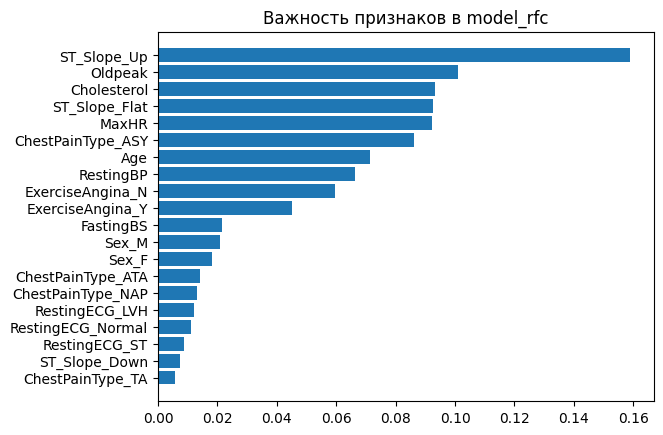

In [ ]:
indices = np.argsort(importances)

fig, ax = plt.subplots()
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
_ = ax.set_yticklabels(np.array(X_train.columns)[indices])
plt.title('Важность признаков в model_rfc')

**7. Обучите бэггинг над моделью из п. 4a. Используйте ensemble.BaggingClassifier.**

  a) Повторите п. 5


In [ ]:
from sklearn.ensemble import  BaggingClassifier

In [ ]:
bagging_dtc = BaggingClassifier(DecisionTreeClassifier(),
                                random_state=42)

In [ ]:
bagging_dtc.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), random_state=42)

In [ ]:
bagging_dtc_y_pred = bagging_dtc.predict(X_test)
bagging_dtc_y_pred

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0])

In [ ]:
print(f'Метрики для bagging_dtc: {classification_report(y_test, bagging_dtc_y_pred)}')

Метрики для bagging_dtc:               precision    recall  f1-score   support

           0       0.78      0.84      0.81        82
           1       0.86      0.80      0.83       102

    accuracy                           0.82       184
   macro avg       0.82      0.82      0.82       184
weighted avg       0.82      0.82      0.82       184



**8. Обучите стекинг трех моделей: из п. 4a, п. 4b и svm.LinearSVC. Используйте ensemble.StackingClassifier.**

  a) Повторите п. 5


In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.svm import LinearSVC

In [ ]:
# Создаем стэккинг и обучаем его на наших данных

clf_stacking = StackingClassifier(
    [
        ('DecisionTree', DecisionTreeClassifier(random_state=42)),
        ('RandomForest', RandomForestClassifier(random_state=42)),
        ('LinearSVC', LinearSVC(random_state=42, max_iter=100000, dual = True))
    ])

In [ ]:
clf_stacking.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

StackingClassifier(estimators=[('DecisionTree',
                                DecisionTreeClassifier(random_state=42)),
                               ('RandomForest',
                                RandomForestClassifier(random_state=42)),
                               ('LinearSVC',
                                LinearSVC(max_iter=100000, random_state=42))])

In [ ]:
print(f'Score on train  {clf_stacking.score(X_train, y_train)}')
print(f'Score on test  {clf_stacking.score(X_test, y_test)}')

Score on train  0.9318801089918256
Score on test  0.8586956521739131


In [ ]:
for i in clf_stacking.named_estimators:
    print(f'Score on train  with model {i} {clf_stacking.named_estimators_[i].score(X_train, y_train)}')
    print(f'Score on test  with model {i} {clf_stacking.named_estimators_[i].score(X_test, y_test)}')

Score on train  with model DecisionTree 1.0
Score on test  with model DecisionTree 0.7934782608695652
Score on train  with model RandomForest 1.0
Score on test  with model RandomForest 0.8913043478260869
Score on train  with model LinearSVC 0.6416893732970027
Score on test  with model LinearSVC 0.657608695652174


In [ ]:
clf_y_pred = clf_stacking.predict(X_test)
clf_y_pred

array([1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1])

In [ ]:
print(f'Метрики для clf_stacking: {classification_report(y_test, clf_y_pred)}')

Метрики для clf_stacking:               precision    recall  f1-score   support

           0       0.91      0.76      0.83        82
           1       0.83      0.94      0.88       102

    accuracy                           0.86       184
   macro avg       0.87      0.85      0.85       184
weighted avg       0.87      0.86      0.86       184



**9. Сформулируйте выводы по проделанной работе.**

**a) Сравните метрики построенных моделей.**

In [ ]:
print(f'Метрики для model_dtc:\n\n {classification_report(y_test, dtc_y_pred)}')
print('_________________________\n')
print(f'Метрики для model_rfc:\n\n  {classification_report(y_test, rfc_y_pred)}')
print('_________________________\n')
print(f'Метрики для bagging_dtc:\n\n  {classification_report(y_test, bagging_dtc_y_pred)}')
print('_________________________\n')
print(f'Метрики для clf_stacking:\n\n  {classification_report(y_test, clf_y_pred)}')

Метрики для model_dtc:

               precision    recall  f1-score   support

           0       0.77      0.77      0.77        82
           1       0.81      0.81      0.81       102

    accuracy                           0.79       184
   macro avg       0.79      0.79      0.79       184
weighted avg       0.79      0.79      0.79       184

_________________________

Метрики для model_rfc:

                precision    recall  f1-score   support

           0       0.89      0.87      0.88        82
           1       0.89      0.91      0.90       102

    accuracy                           0.89       184
   macro avg       0.89      0.89      0.89       184
weighted avg       0.89      0.89      0.89       184

_________________________

Метрики для bagging_dtc:

                precision    recall  f1-score   support

           0       0.78      0.84      0.81        82
           1       0.86      0.80      0.83       102

    accuracy                           0.82      

**b) Напишите свое мнение, какая модель наилучшая и почему.**

В настоящем задании необходимо было решить задачу классификации наличия болезни сердца у пациентов.

С практической точки зрения полезность модели необходимо определять не только тем, насколько хорошо она находит пациентов, у которых болезнь сердца действительно есть, но и в случае сомнений, все равно классифицировать таких пациентов как пациентов с такой болезнью (лучше провести в отношении пациента дополнительное обследование, чем пропустить у него наличие заболевания).


Исходя из этого, наиболее предпочтительной метрикой для нас будет Recall (Полнота) (показывающей, какую долю объектов положительного класса из всех объектов положительного класса нашёл алгоритм).

**Таким образом, следует выбрать модель с более высоким показателем Recall**, поскольку это будет означать, что наша модель точнее выявляет пациентов с болезнью сердца из всех пациентов, у которых эта болезнь действительно есть.

**В нашем случае, такой моделью является модель на основе стекинга - clf_stacking.**

Показатель Recall **0,94** для класса 1 (пациент с болезнью сердца) у clf_stacking означает, что модель в 94% случаях у пациентов с болезнью сердца верно определяет наличие такой болезни.